# Narrative Flow of Men and Women



 ### Hypothesis:

Men and women discuss sociability and solidarity in different ways, i.e. in different contexts. (..) Solidarity and social relations were different in the men and women section of Birkenau; men and women recall them in different ways and contexts. In practice, this means that they are primed and followed by different topics in the narratives of men and women.

If the hypothesis is true:
- the story line (or narrative flow) leading to the discussion of sociability and solidarity is different in testimonies of men and women
- the most likely sequences of topics (to be named narrative pathway) leading to topics describing solidarity and sociability are different
- different amount of traffic is going through  similar pathways leading to solidarity and sociability
- different nodes (to be named priming topics) are preceding and following (to be named exit topics) topics of solidarity and sociability


Key research questions to be studied here:
- What are the major pathways between the memory of arrival to Birkenau and leaving from Birkenau?
- How are nodes related to solidarity (food sharing, aid giving) and social bonds (friends, social bonds, family) are situated along the major pathways? For women and men, are they peripheral or central? I.e. do a significant amount of narrative flow go towards them for men and women?
- What are the exit and priming topics for solidarity (food sharing, aid giving) and social bonds for men and women?
- How are these topics related to survival explanations?
- How is friendship related to aid giving for men and for women? What are the transitory topics between them?
- What are those topics that prime topics of solidarity and social bonds?
- Where did solidarity take place? In what contexts did solidarity take place?
- What topics do topics related to solidarity and social bonds prime for men and women?


In [7]:
import constants
import pandas as pd
import os
from IPython.display import display
import json
import pyemma
from tables import *
import sys; sys.path.insert(0, '..')
from markov_modelling.markov_utils import *

## Load the relevant data

Load interview

Set up the paths to data

Two different datasets were created. In Dataset 1, the topic 'social bonds' include 'friendship' as well; similarly the topic 'aid giving' includes 'food sharing'. In Dataset 2, 'friendship' and 'food sharing' are distinguished, and they are different topics.

First, load Dataset 1

In [8]:
input_directory = constants.output_data_markov_modelling
path = os.getcwd()
parent = os.path.abspath(os.path.join(path, os.pardir))
input_directory = parent +'/'+ constants.output_data_markov_modelling
data_set_1_w  = pyemma.load(input_directory+'complete_w'+'/'+'pyemma_model','simple')
data_set_1_m = pyemma.load(input_directory+'complete_m'+'/'+'pyemma_model','simple')
data_set_1_complete = pyemma.load(input_directory+'complete'+'/'+'pyemma_model','simple')
input_directory = parent +'/'+ constants.output_data_segment_keyword_matrix
features_df = pd.read_csv(input_directory+constants.output_segment_keyword_matrix_feature_index)
features_df = features_df.drop(columns=['Unnamed: 0','index'])

Load Dataset 2

In [9]:
input_directory = 'data/output_aid_giving_sociability_expanded/markov_modelling/'

path = os.getcwd()
parent = os.path.abspath(os.path.join(path, os.pardir))
input_directory = parent +'/'+ input_directory
data_set_2_w  = pyemma.load(input_directory+'complete_w'+'/'+'pyemma_model','simple')
data_set_2_m = pyemma.load(input_directory+'complete_m'+'/'+'pyemma_model','simple')
data_set_2_complete = pyemma.load(input_directory+'complete'+'/'+'pyemma_model','simple')
input_directory = parent +'/'+ 'data/output_aid_giving_sociability_expanded/segment_keyword_matrix/'
features_df_2 = pd.read_csv(input_directory+constants.output_segment_keyword_matrix_feature_index)
features_df_2 = features_df_2.drop(columns=['Unnamed: 0','index'])


## Observation 1

### Qualitative description

For women, the main topic that primes the discussion of aid giving is the discussion of the living conditions. By contrast, the most important topic that primes aid giving for men is the discussion of forced labour activity. 

For women, the most important narrative trajectory leading to the discussion of aid giving is the following one (8.3 % of the total traffic is going through it):
- arrival-camp intake procedures-living conditions-aid giving

For men, the most important narrative trajectory leading to the discussion of aid giving is the following one (5 % of the total traffic is going through it):
- arrival-selections-camp intake procedures-living conditions-forced labor-aid giving

Both men and women discuss aid giving in the context of camp living conditions and forced labour, women are more likely to discuss it in the context of camp living conditions. While men are more likely to discuss it in the context of forced labour.

In [10]:
story_start = 'arrival'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()

In [11]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.1)

Path flux		%path	%of total	path
arrival-camp intake procedures-living conditions-aid giving
8.39382537169631
arrival-selections-camp intake procedures-tattoo-forced labor-aid giving
5.105243689528877


In [12]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.1)

Path flux		%path	%of total	path
arrival-selections-camp intake procedures-living conditions-forced labor-aid giving
6.532360256285166
arrival-camp intake procedures-living conditions-aid giving
4.970587667147406


### Visualization

7 labels to show
6 labels to show


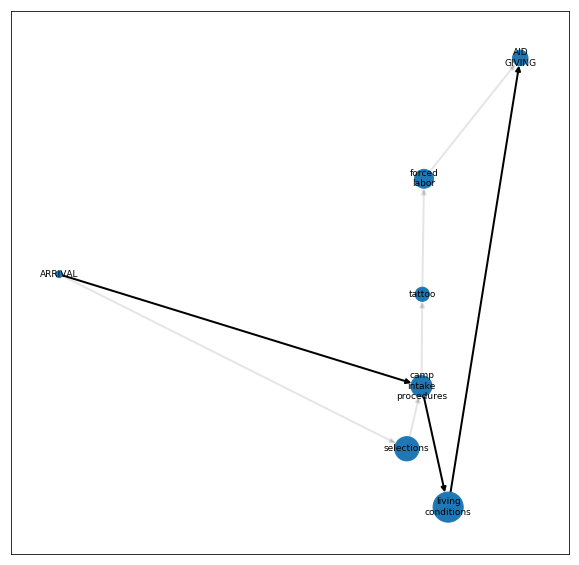

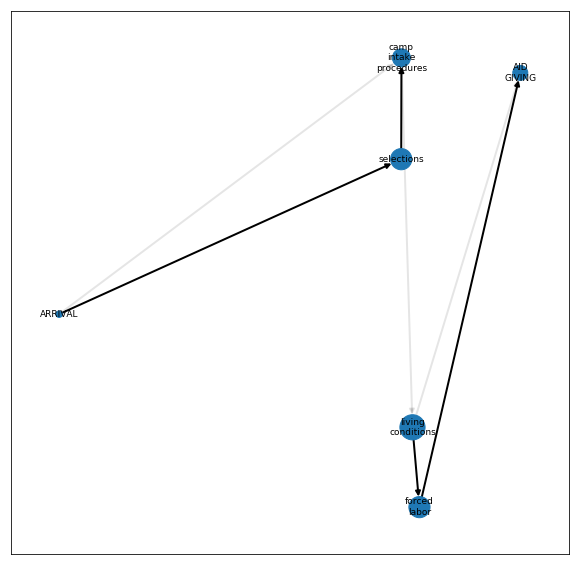

In [13]:
flux = 0.1
visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

In [14]:
story_start = 'living conditions'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()

In [15]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.1)

Path flux		%path	%of total	path
living conditions-aid giving
10.282745810553774


In [16]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.1)

Path flux		%path	%of total	path
living conditions-forced labor-aid giving
7.291474232606827
living conditions-aid giving
6.463631812734439


In [17]:
flux=0.13

3 labels to show
3 labels to show


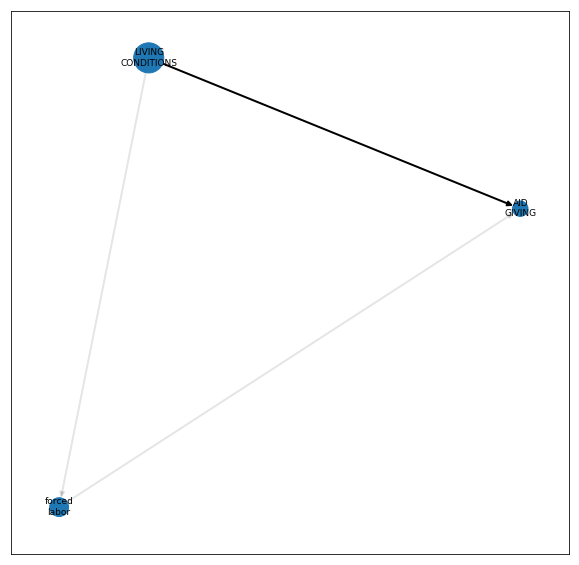

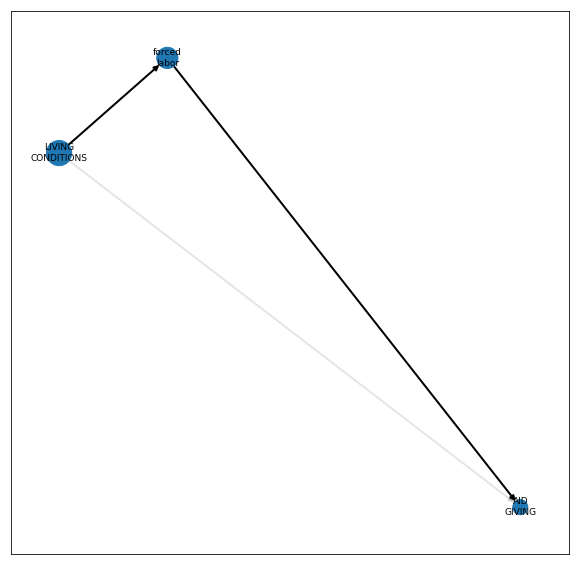

In [18]:
visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 2

### Qualitative description

As above, a key topic that follows the discussion of aid giving is forced labour. However, this has different weight in the narratives of men and women. Men are more likely to discuss forced labour following aid giving. In testimonies of men, more traffic is going through the following pathway (3,6% women versus 6,2% men):

-aid giving-forced labor-departure.

In [19]:
story_start = 'aid giving'
story_end = 'departure'
flux = 0.25

In [20]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
aid giving-selections-camp intake procedures-living conditions-departure
8.046037193387876
aid giving-departure
6.030080764005773
aid giving-living conditions-selections-departure
4.713800313321534
aid giving-camp population-departure
3.8598552686382948
aid giving-forced labor-departure
3.622968591197528


In [21]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
aid giving-selections-camp intake procedures-living conditions-departure
7.375822464218012
aid giving-forced labor-departure
6.503890975724772
aid giving-departure
5.3249762706593495
aid giving-camp population-departure
4.378112964873297
aid giving-living conditions-food and thirst-departure
3.6802208148065807


### Visualization

7 labels to show
6 labels to show


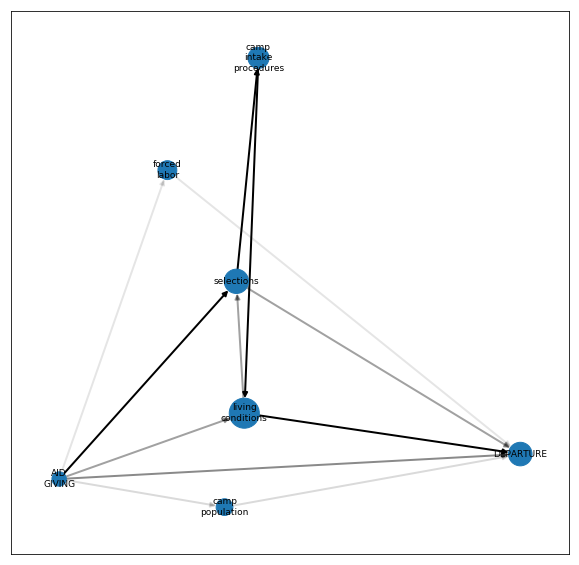

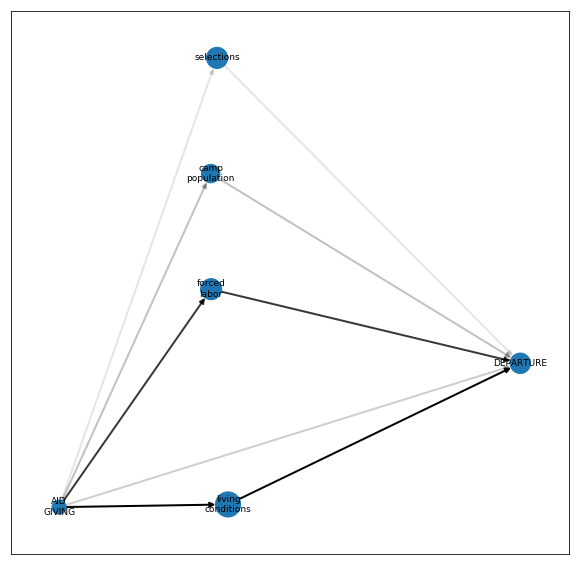

In [22]:
flux = 0.25
visualize_most_important_paths(data_set_2_w,flux,features_df_2,story_start,story_end,None)
visualize_most_important_paths(data_set_2_m,flux,features_df_2,story_start,story_end,None)

## Observation 3

### Qualitative description

Similarly to aid giving, women tend to discuss food sharing in the context of living conditions, whereas men discuss it in the context of forced labour. For women, food sharing is most likely to be primed by the discussion of living conditions, for men food sharing tends to be primed by forced labour. In testimonies of women, the major traffic (16,5%) towards food sharing are going through the following two pathways:
- arrival-camp intake procedures-living conditions-food and thirst-food sharing
- arrival-selections-camp intake procedures-living conditions-food sharing

By contrast, in testimonies of men, the major traffic ( 11.33405389131642%) towards food sharing are going through the following pathways:
- arrival-selections-camp intake procedures-living conditions-forced labor-food sharing




### Visualization

In [23]:
story_start = 'arrival'
story_end = 'food sharing'
flux = 0.17

In [24]:
flux_w = calculate_flux(data_set_2_w,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
arrival-camp intake procedures-living conditions-food and thirst-food sharing
8.675675138683426
arrival-selections-camp intake procedures-living conditions-food sharing
8.3280010784989


In [25]:
flux_m = calculate_flux(data_set_2_m,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
arrival-selections-camp intake procedures-living conditions-forced labor-food sharing
10.583044467814025
arrival-camp intake procedures-living conditions-food sharing
9.237651260489812


In [26]:
flux = 0.17

6 labels to show
6 labels to show


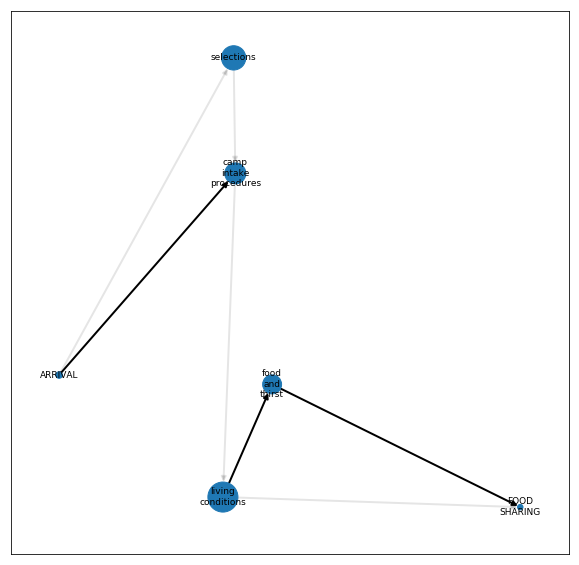

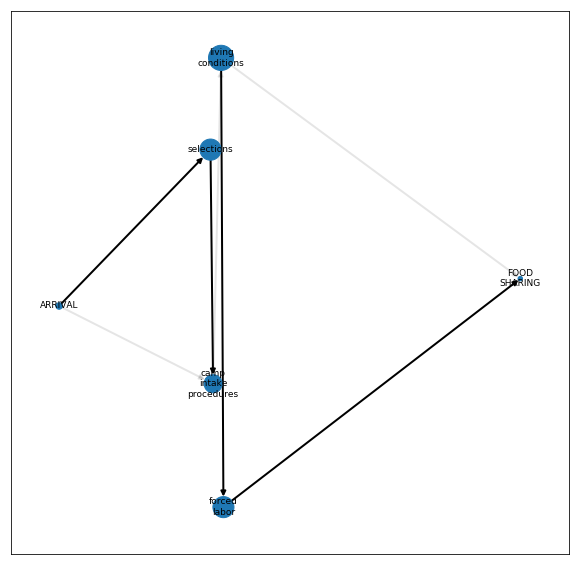

In [27]:
visualize_most_important_paths(data_set_2_w,flux,features_df_2,story_start,story_end,None)
visualize_most_important_paths(data_set_2_m,flux,features_df_2,story_start,story_end,None)

## Observation 4

### Qualitative description

In testimonies of men and women, different topics are the ones that are most likely to follow food sharing. The topic that is the most likely to follow food sharing in women testimonies is again living conditions. By contrast men tend to discuss forced labour and selection following food sharing.

### Visualization

In [28]:
story_start = 'food sharing'
story_end = 'departure'
flux = 0.2

In [29]:
flux_w = calculate_flux(data_set_2_w,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
food sharing-living conditions-departure
7.900151646380355
food sharing-selections-departure
4.659659756646475
food sharing-family-camp intake procedures-living conditions-transfer-departure
4.287123248980678
food sharing-adaptation methods-departure
3.9316967806736227


In [30]:
flux_m = calculate_flux(data_set_2_m,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
food sharing-selections-camp intake procedures-living conditions-departure
7.600159473199191
food sharing-forced labor-departure
6.365413368271578
food sharing-departure
4.2257678335542685
food sharing-camp population-departure
4.177713978192898


8 labels to show
7 labels to show


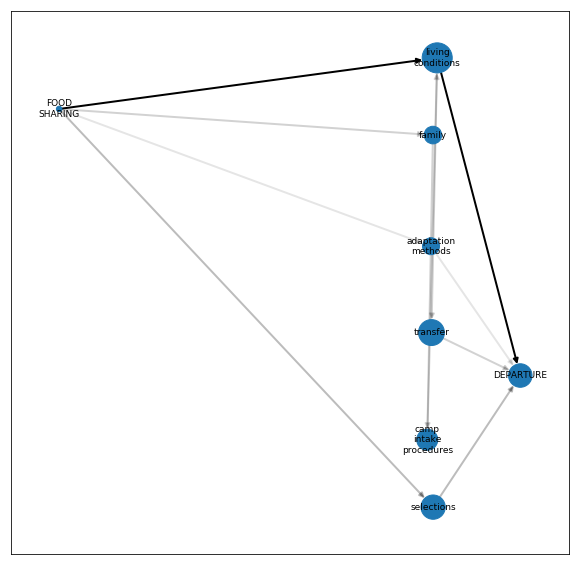

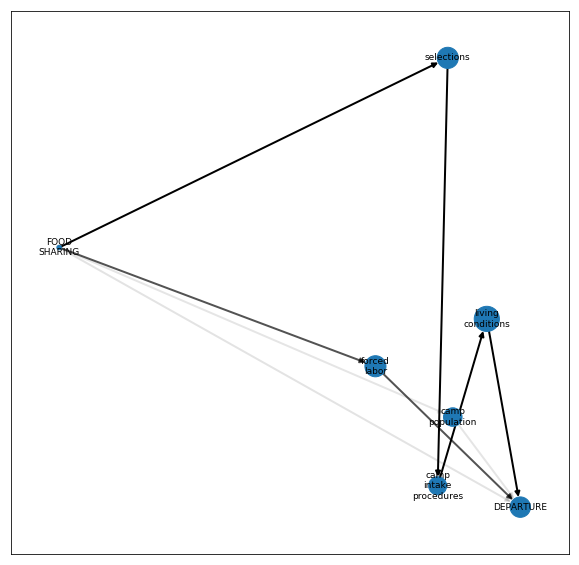

In [31]:
visualize_most_important_paths(data_set_2_w,flux,features_df_2,story_start,story_end,None)
visualize_most_important_paths(data_set_2_m,flux,features_df_2,story_start,story_end,None)

## Observation 5

### Qualitative description

In narratives of women, the discussion of friendship tends to be preceded by the discussion of living environments and housing conditions. Very different amount of traffic is going through the following two narrative pathways :

- Women (12.2%):arrival-camp intake procedures-living conditions-friends
- Men (5.2%): arrival-selections-camp intake procedures-living conditions-friends



## Visualization

Path flux		%path	%of total	path
arrival-camp intake procedures-living conditions-friends
12.225489098372474
arrival-selections-camp intake procedures-kapos-friends
4.993007952615237


Path flux		%path	%of total	path
arrival-selections-camp intake procedures-living conditions-friends
6.0307746661837
arrival-camp intake procedures-living conditions-forced labor-friends
4.33498852383761
arrival-selections-camp intake procedures-tattoo-forced labor-awareness-friends
4.255112214221717
arrival-camp intake procedures-living conditions-departure-post-conflict experience-friends
4.063078809550656
6 labels to show
10 labels to show


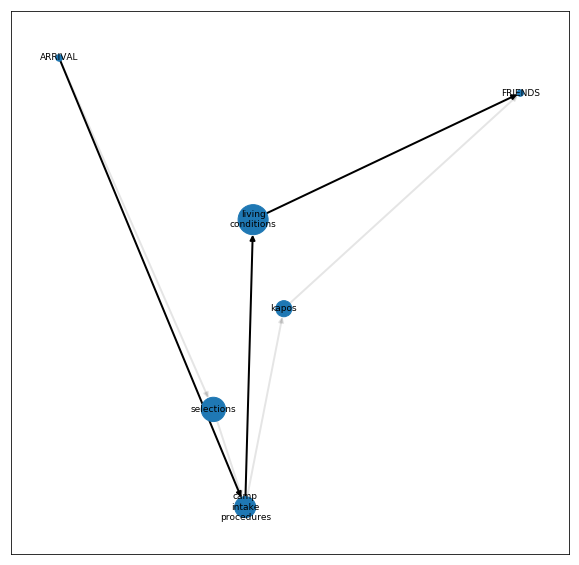

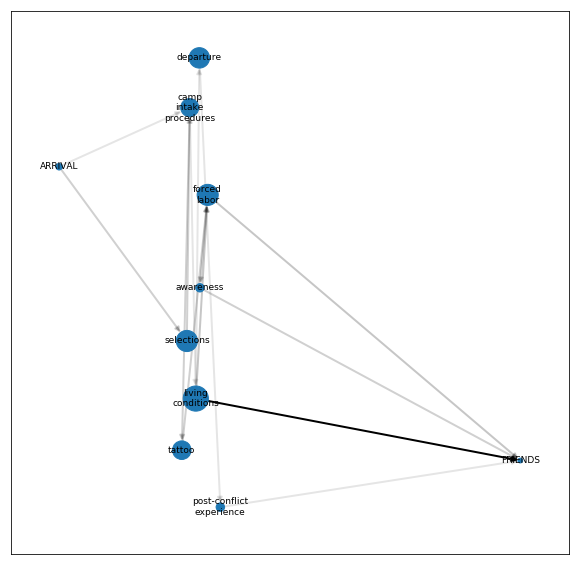

In [32]:
story_start = 'arrival'
story_end = 'friends'
flux = 0.15
flux_w = calculate_flux(data_set_2_w,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_2_m,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
visualize_most_important_paths(data_set_2_w,flux,features_df_2,story_start,story_end,None)
visualize_most_important_paths(data_set_2_m,flux,features_df_2,story_start,story_end,None)

## Observation 6

### Qualitative description

In narratives of women, the most immediate topic that follows the discussion of friendship is living conditions; this pattern is very weakly present in testimonies of men.


## Visualization

Path flux		%path	%of total	path
friends-living conditions-departure
9.908626830273077
friends-selections-departure
5.382283699025054
friends-camp population-departure
3.925481579238679
friends-adaptation methods-departure
3.900866934236143
friends-forced labor-departure
3.647550451447244


Path flux		%path	%of total	path
friends-camp intake procedures-living conditions-departure
6.51720086577397
friends-adaptation methods-departure
4.761893446471717
friends-transfer-departure
4.5813650576051055
friends-tattoo-living conditions-forced labor-departure
4.57068862773716
friends-selections-departure
4.027548662637209
friends-departure
3.995297386247268
7 labels to show
9 labels to show


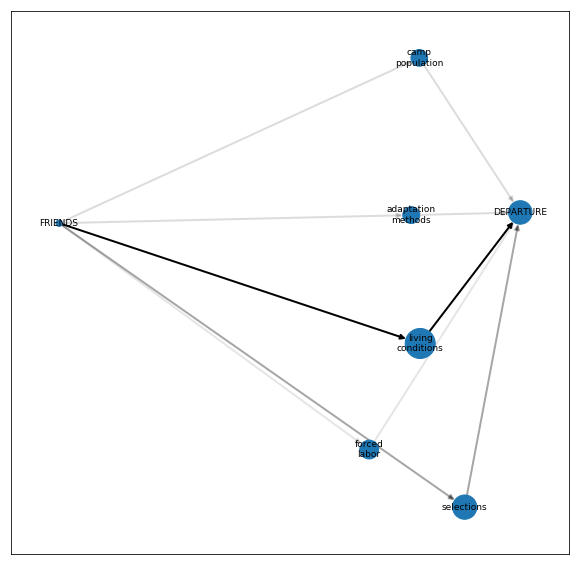

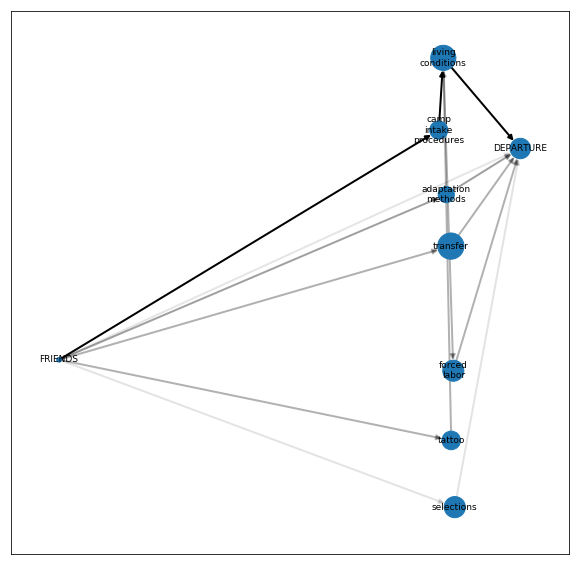

In [33]:
story_start = 'friends'
story_end = 'departure'
flux = 0.25
flux_w = calculate_flux(data_set_2_w,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_2_m,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
visualize_most_important_paths(data_set_2_w,flux,features_df_2,story_start,story_end,None)
visualize_most_important_paths(data_set_2_m,flux,features_df_2,story_start,story_end,None)

## Observation 7

## Qualitative description

If we look at all possible narrative pathways that can connect arrival to and departure from Birkenau, we  can see that a significant amount of traffic is going through aid giving (4%) and social bonds (3.85%). Their significance can be understood if they are compared to Appel, where 9% of traffic is going through. The amount of traffic going through friendship (0.43%) and food sharing (0.48%) is less significant. I

In case of women, more traffic is going through these nodes, with an exception of food sharing:

- social bonds: 3.9 %
- aid giving: 5 %
- friendship: 0.71
- food sharing:  0.41 %

In case of men, less traffic is going through these nodes:

- social bonds: 3 %
- aid giving: 4 %
- friendship: 0.27
- food sharing:  0.53 %

#### Total traffic going through them in the complete dataset (men and women):

In [34]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_complete = calculate_flux(data_set_1_complete,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
flux_complete_dataset_2 = calculate_flux(data_set_2_complete,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Path flux		%path	%of total	path
arrival-camp intake procedures-living conditions-departure
9.9944885568238
arrival-selections-departure
5.861211544671106
arrival-selections-camp intake procedures-living conditions-transfer-departure
4.774300913741695
arrival-camp intake procedures-tattoo-forced labor-departure
4.407641766721469
arrival-selections-camp intake procedures-mass murder awareness-departure
3.256126482103831
arrival-loved ones' separations-camp intake procedures-kapos-departure
3.1625482077563944
arrival-family-departure
2.9291277459634015
arrival-camp intake procedures-living conditions-adaptation methods-departure
2.8863423776312644
arrival-selections-camp intake procedures-living conditions-food and thirst-departure
2.798440150199532
arrival-camp population-departure
2.4657772789961747
arrival-loved ones' separations-camp intake procedures-living conditions-social bonds-departure
2.2285718340995646
arrival-camp intake procedures-living conditions-forced labor-aid giving-de

Path flux		%path	%of total	path
arrival-camp intake procedures-living conditions-departure
9.913336514234691
arrival-selections-departure
6.031440824673716
arrival-selections-camp intake procedures-living conditions-transfer-departure
4.753079435593002
arrival-camp intake procedures-tattoo-forced labor-departure
4.62264174058892
arrival-selections-camp intake procedures-mass murder awareness-departure
3.208798034134208
arrival-loved ones' separations-camp intake procedures-living conditions-kapos-departure
2.954185077630031
arrival-family-departure
2.8907263563026016
arrival-camp intake procedures-living conditions-food and thirst-departure
2.853854424524325
arrival-selections-camp intake procedures-living conditions-adaptation methods-departure
2.810945432400456
arrival-camp population-departure
2.427173149758009
arrival-loved ones' separations-camp intake procedures-Appell-departure
2.006340425841309
arrival-camp intake procedures-food and thirst-selections-transfer-departure
1.95433

Calculate the total traffic going through social bonds

In [35]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []
total_escapes = []

In [36]:
for i,element in enumerate(flux_complete):
    if 'social bonds' in element.split('-'):
        total_social_bonds.append(flux_complete[element])
print(np.array(total_social_bonds).sum())

4.066841106066457


Calculate the total traffic going through aid giving

In [37]:
for i,element in enumerate(flux_complete):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_complete[element])
print(np.array(total_aid_giving).sum())

4.121056003409804


Calculate the total traffic going through Appell

In [38]:
for i,element in enumerate(flux_complete):
    if 'Appell' in element.split('-'):
        total_appell.append(flux_complete[element])
print(np.array(total_appell).sum())

10.354947043290435


Calculate the total traffic going through escape

In [39]:
for i,element in enumerate(flux_complete):
    if 'escapes' in element.split('-'):
        total_escapes.append(flux_complete[element])
print(np.array(total_escapes).sum())

0.9080808333901529


Calculate the total traffic going through friendship

In [40]:
for i,element in enumerate(flux_complete_dataset_2):
    if 'friends' in element.split('-'):
        total_friends.append(flux_complete_dataset_2[element])
print(np.array(total_friends).sum())

0.5829858429558318


Calculate the total traffic going through food sharing

In [41]:
for i,element in enumerate(flux_complete_dataset_2):
    if 'food sharing' in element.split('-'):
        total_food_sharing.append(flux_complete_dataset_2[element])
print(np.array(total_food_sharing).sum())

0.4484129055594156


#### Total traffic going through them in the dataset of women

In [42]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
flux_w_dataset_2 = calculate_flux(data_set_2_w,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Path flux		%path	%of total	path
arrival-camp intake procedures-living conditions-departure
10.287004405689585
arrival-selections-departure
6.425816705213319
arrival-camp intake procedures-living conditions-transfer-departure
5.184591216623627
arrival-selections-camp intake procedures-tattoo-forced labor-departure
3.6631898036453108
arrival-family-departure
2.9983350176925683
arrival-loved ones' separations-camp intake procedures-mass murder awareness-departure
2.9617322492555536
arrival-camp intake procedures-kapos-departure
2.8632833819437975
arrival-selections-camp intake procedures-living conditions-adaptation methods-departure
2.5807426289463855
arrival-camp population-departure
2.4816206521910273
arrival-loved ones' separations-camp intake procedures-living conditions-food and thirst-departure
2.411106581242104
arrival-selections-camp intake procedures-living conditions-social bonds-departure
2.34831206691166
arrival-camp intake procedures-living conditions-selections-transfer-dep

Path flux		%path	%of total	path
arrival-camp intake procedures-living conditions-departure
10.26070050105121
arrival-selections-departure
6.73782358135187
arrival-camp intake procedures-living conditions-transfer-departure
5.080056335784527
arrival-selections-camp intake procedures-tattoo-forced labor-departure
3.6563989316788237
arrival-loved ones' separations-camp intake procedures-mass murder awareness-departure
2.960455446381023
arrival-camp intake procedures-kapos-departure
2.9200505163024997
arrival-selections-camp intake procedures-living conditions-adaptation methods-departure
2.886901684386067
arrival-family-departure
2.853396328534324
arrival-loved ones' separations-camp intake procedures-living conditions-selections-transfer-departure
2.5934166882495213
arrival-camp intake procedures-living conditions-food and thirst-departure
2.5690123724486877
arrival-camp population-departure
2.3292784237284088
arrival-selections-camp intake procedures-living conditions-social bonds-depar

In [43]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []

Calculate the total traffic going through social bonds

In [44]:
for i,element in enumerate(flux_w):
    if 'social bonds' in element.split('-'):
        total_social_bonds.append(flux_w[element])
print(np.array(total_social_bonds).sum())

4.135765869027403


Calculate the total traffic going through aid giving

In [45]:
for i,element in enumerate(flux_w):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_w[element])
print(np.array(total_aid_giving).sum())

4.476549435386917


Calculate the total traffic going through friendship

In [46]:
for i,element in enumerate(flux_w_dataset_2):
    if 'friends' in element.split('-'):
        total_friends.append(flux_w_dataset_2[element])
print(np.array(total_friends).sum())

0.7325903347770718


Calculate the total traffic going through food sharing

In [47]:
for i,element in enumerate(flux_w_dataset_2):
    if 'food sharing' in element.split('-'):
        total_food_sharing.append(flux_w_dataset_2[element])
        print (element)
        print (flux_w_dataset_2[element])
print(np.array(total_food_sharing).sum())

arrival-kapos-selections-camp intake procedures-food and thirst-food sharing-departure
0.4285433267690841
arrival-food sharing-camp population-selections-camp intake procedures-living conditions-social bonds-family-loved ones' fates-awareness-forced marches-liberators-attitudes-departure
0.02273824738943897
0.45128157415852305


#### Total traffic going through them in the dataset of men

In [48]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
flux_m_dataset_2 = calculate_flux(data_set_2_m,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Path flux		%path	%of total	path
arrival-selections-camp intake procedures-living conditions-departure
8.72365169355726
arrival-camp intake procedures-living conditions-forced labor-departure
6.525588796869122
arrival-selections-departure
4.724733736005506
arrival-camp intake procedures-food and thirst-departure
4.139330506963246
arrival-selections-camp intake procedures-living conditions-kapos-departure
3.458357484762831
arrival-camp intake procedures-living conditions-adaptation methods-departure
3.2650403969626822
arrival-selections-camp intake procedures-living conditions-transfer-departure
3.177584258132416
arrival-mass murder awareness-departure
3.0407468506884734
arrival-loved ones' separations-camp intake procedures-tattoo-forced labor-aid giving-departure
2.666730176267966
arrival-family-departure
2.623452014486925
arrival-camp intake procedures-tattoo-departure
2.5135304326144565
arrival-camp population-departure
2.439814977946649
arrival-selections-camp intake procedures-tatt

Path flux		%path	%of total	path
arrival-selections-camp intake procedures-living conditions-departure
8.952621676999714
arrival-camp intake procedures-living conditions-forced labor-departure
6.420217968857073
arrival-selections-departure
4.570694296939778
arrival-camp intake procedures-food and thirst-departure
3.9338578512287263
arrival-selections-camp intake procedures-living conditions-adaptation methods-departure
3.4585957057527845
arrival-camp intake procedures-living conditions-transfer-departure
3.436399301348594
arrival-selections-camp intake procedures-living conditions-kapos-departure
3.334974061927977
arrival-mass murder awareness-departure
3.060677421949428
arrival-loved ones' separations-camp intake procedures-tattoo-departure
2.588829290735889
arrival-family-departure
2.5741603155906785
arrival-camp intake procedures-tattoo-living conditions-Appell-departure
2.525400347456541
arrival-camp population-departure
2.5192102143991533
arrival-selections-camp intake procedures-k

In [49]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []



Calculate the total traffic going through social bonds

In [50]:
for i,element in enumerate(flux_m):
    if 'social bonds' in element.split('-'):
        total_social_bonds.append(flux_m[element])
print(np.array(total_social_bonds).sum())

2.731881534684127


Calculate the total traffic going through aid giving

In [51]:
for i,element in enumerate(flux_m):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_m[element])
print(np.array(total_aid_giving).sum())

5.839134581979824


Calculate the total traffic going through friendship

In [52]:
for i,element in enumerate(flux_m_dataset_2):
    if 'friends' in element.split('-'):
        total_friends.append(flux_m_dataset_2[element])
print(np.array(total_friends).sum())

0.35304941739207557


Calculate the total traffic going through food sharing

In [53]:
total_food_sharing = []

In [54]:
for i,element in enumerate(flux_m_dataset_2):
    if 'food sharing' in element.split('-'):
        print (element)
        print (flux_m_dataset_2[element])
        total_food_sharing.append(flux_m_dataset_2[element])
print(np.array(total_food_sharing).sum())

arrival-perpetrators-selections-camp intake procedures-food and thirst-deceptions-forced labor-food acquisition-food sharing-departure
0.49423838063171094
arrival-food sharing-selections-camp intake procedures-clothing-living conditions-language skills-departure
0.043147307637373185
arrival-food sharing-selections-transfer-post-conflict activity-departure
0.005076472049900893
0.5424621603189851


## Observation 8

### Qualitative Description

In testimonies of women there are important narrative pathways that lead to the discussion of survival explanations and involve social bonds and aid giving as states preceding survival explanations; in testimonies of men such paths have significantly less traffic. We can see a similar pattern with friends and food sharing, though they are less significant.

In [55]:
story_start = 'arrival'
story_end = 'survival explanations'


In [56]:
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
arrival-camp intake procedures-living conditions-survival explanations
7.53662346544112
arrival-selections-survival explanations
5.563274610474022
arrival-camp intake procedures-tattoo-forced labor-survival explanations
5.024693485802254
arrival-selections-camp intake procedures-living conditions-social bonds-survival explanations
4.013736671936417
arrival-family-survival explanations
3.867166647975
arrival-camp intake procedures-mass murder awareness-survival explanations
3.842535874332474
arrival-loved ones' separations-camp intake procedures-living conditions-adaptation methods-survival explanations
3.7551875422580547
arrival-selections-camp intake procedures-Appell-survival explanations
3.6888868518791074
arrival-camp intake procedures-living conditions-forced labor-aid giving-survival explanations
3.3195973458238246
arrival-loved ones' separations-camp intake procedures-living conditions-food and thirst-camp population-survival explanations
2.952188

Path flux		%path	%of total	path
arrival-selections-camp intake procedures-living conditions-survival explanations
6.3354267534596955
arrival-selections-survival explanations
5.560224892002948
arrival-camp intake procedures-living conditions-forced labor-camp population-survival explanations
5.032043040076962
arrival-camp intake procedures-living conditions-departure-survival explanations
4.846717423570047
arrival-selections-camp intake procedures-food and thirst-survival explanations
4.481752990869494
arrival-camp intake procedures-tattoo-forced labor-survival explanations
4.247176368880928
arrival-selections-camp intake procedures-tattoo-survival explanations
4.027689156039271
arrival-loved ones' separations-camp intake procedures-living conditions-adaptation methods-survival explanations
3.2593659524189924
arrival-camp intake procedures-living conditions-food and thirst-selections-loved ones' fates-survival explanations
3.2395905174129047
arrival-loved ones' separations-camp intake p

Find social bonds in women narratives

In [57]:
for element in flux_w:
    if 'social bonds' in element.split('-'):
        print (element)
        print (flux_w[element])
        print ('\n')

arrival-selections-camp intake procedures-living conditions-social bonds-survival explanations
4.013736671936417


arrival-social bonds-selections-camp intake procedures-living conditions-departure-liberators-survival explanations
0.7298282653131469


arrival-tattoo-living conditions-social bonds-rumors-survival explanations
0.5287217410709817


arrival-social bonds-selections-camp intake procedures-mass murder awareness-corpses-survival explanations
0.007440578061241491


arrival-social bonds-selections-camp intake procedures-forced labor-liquidations-survival explanations
0.0009867534126264622




Find aid giving in women narratives

In [58]:
for element in flux_w:
    if 'aid giving' in element.split('-'):
        print (element)
        print (flux_w[element])
        print ('\n')

arrival-camp intake procedures-living conditions-forced labor-aid giving-survival explanations
3.3195973458238246


arrival-aid giving-selections-loved ones' separations-loved ones' contacts-loved ones' fates-survival explanations
1.0164565544964574


arrival-preferential treatment-aid giving-selections-camp intake procedures-Appell-warnings-survival explanations
0.2850700651375394


arrival-aid giving-selections-departure-photographs-family-personal property seizure-survival explanations
0.011168262349654694




Find social bonds in men narratives

In [59]:
for element in flux_m:
    if 'social bonds' in element.split('-'):
        print (element)
        print (flux_m[element])
        print ('\n')

arrival-psychological reactions-camp intake procedures-living conditions-social bonds-resistance-survival explanations
0.8530941142005241


arrival-diseases-selections-camp intake procedures-food and thirst-social bonds-survival explanations
0.433987116497311


arrival-social bonds-tattoo-living conditions-attitudes-survival explanations
0.20800709620800525


arrival-resistance-tattoo-living conditions-social bonds-survival explanations
0.10220595520368962


arrival-loved ones' togetherness decisions-camp procedures-forced labor-food and thirst-social bonds-survival explanations
0.019722226833305635


arrival-children-food and thirst-social bonds-survival explanations
0.0018663599687102706


arrival-escapes-adaptation methods-departure-transportation-camp intake procedures-living conditions-social bonds-survival explanations
0.0013494821943126631




Find aid giving in men narratives

In [60]:
for element in flux_m:
    if 'aid giving' in element.split('-'):
        print (element)
        print (flux_m[element])
        print ('\n')

arrival-camp population-selections-camp intake procedures-tattoo-forced labor-aid giving-survival explanations
2.3070429277764672


arrival-aid giving-selections-camp intake procedures-living conditions-Appell-survival explanations
1.0526155148900662


arrival-twins-Mengele, Josef-camp intake procedures-living conditions-Appell-forced labor-aid giving-selections-adaptation methods-military-survival explanations
0.41165378964981447


arrival-camp procedures-forced labor-aid giving-selections-camp intake procedures-living conditions-children-survival explanations
0.2848064805432545


arrival-aid giving-selections-camp intake procedures-kapos-preferential treatment-survival explanations
0.2118634660221983


arrival-creative activity-forced labor-aid giving-selections-camp intake procedures-living conditions-attitudes-survival explanations
0.014557741765123278


arrival-covert activities-aid giving-selections-camp intake procedures-forced labor-barter-survival explanations
0.01198754785920

## Visualize

Notice that aid giving and social bonds are "missing" from the plot showing men

14 labels to show
13 labels to show


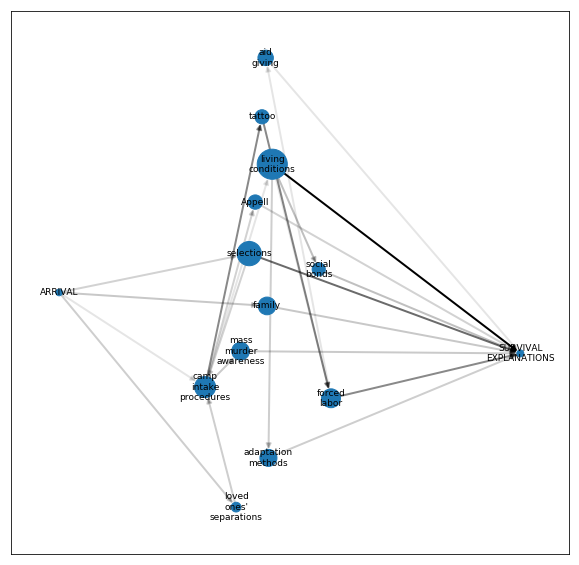

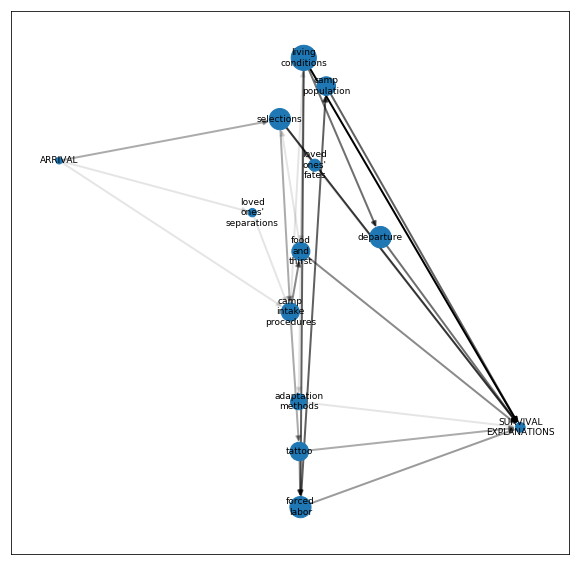

In [61]:
flux = 0.4
visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

In [62]:
story_start = 'arrival'
story_end = 'survival explanations'
flux = 1
flux_w = calculate_flux(data_set_2_w,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_2_m,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



Path flux		%path	%of total	path
arrival-camp intake procedures-living conditions-survival explanations
7.17064811515039
arrival-selections-survival explanations
5.667748371186374
arrival-camp intake procedures-tattoo-forced labor-survival explanations
5.119785891625878
arrival-selections-camp intake procedures-living conditions-adaptation methods-survival explanations
4.24296558750123
arrival-camp intake procedures-mass murder awareness-survival explanations
4.053655757829678
arrival-family-survival explanations
3.8436895441986723
arrival-loved ones' separations-camp intake procedures-Appell-survival explanations
3.6037915566964935
arrival-selections-Mengele, Josef-survival explanations
2.9598151564346287
arrival-camp intake procedures-kapos-survival explanations
2.8441882671069223
arrival-loved ones' separations-camp intake procedures-living conditions-forced labor-aid giving-survival explanations
2.8357204949703347
arrival-selections-camp intake procedures-living conditions-social bo

Path flux		%path	%of total	path
arrival-selections-camp intake procedures-living conditions-survival explanations
5.910355025593801
arrival-selections-survival explanations
5.706278557822931
arrival-camp intake procedures-food and thirst-survival explanations
5.0109874833163
arrival-camp intake procedures-living conditions-forced labor-survival explanations
4.472550493547471
arrival-selections-camp intake procedures-tattoo-forced labor-camp population-survival explanations
4.386403597943627
arrival-camp intake procedures-tattoo-survival explanations
4.032497535879174
arrival-selections-camp intake procedures-living conditions-departure-survival explanations
3.654676915355621
arrival-loved ones' separations-camp intake procedures-living conditions-transfer-killings-survival explanations
3.354409949374846
arrival-camp intake procedures-living conditions-adaptation methods-survival explanations
3.3274400335581396
arrival-selections-loved ones' fates-survival explanations
3.210431317268954

Find friends in women narratives

In [63]:
for element in flux_w:
    if 'friends' in element.split('-'):
        print (element)
        print (flux_w[element])
        print ('\n')

arrival-forced labor-perpetrators-camp intake procedures-living conditions-friends-survival explanations
0.8755887922585025


arrival-personal property seizure-living conditions-children-friends-survival explanations
0.5055053907024801


arrival-friends-social bonds-selections-deceptions-survival explanations
0.29521999151322187


arrival-Appell-food and thirst-selections-camp intake procedures-living conditions-aid giving-friends-survival explanations
0.07859848951277018




Find food sharing in women narratives

In [64]:
for element in flux_w:
    if 'food sharing' in element.split('-'):
        print (element)
        print (flux_w[element])
        print ('\n')

arrival-mass murder awareness-camp population-selections-camp intake procedures-food and thirst-food sharing-survival explanations
0.7614306295810456


arrival-food sharing-camp population-selections-camp intake procedures-living conditions-kapos-warnings-survival explanations
0.0227765461527551




Find friends in men narratives

In [65]:
for element in flux_m:
    if 'friends' in element.split('-'):
        print (element)
        print (flux_m[element])
        print ('\n')

arrival-loved ones' contacts-camp intake procedures-forced labor-medical care-post-conflict experience-friends-survival explanations
0.3459442283107681


arrival-selections-camp intake procedures-living conditions-attitudes-post-conflict experience-friends-survival explanations
0.029825988968579253


arrival-stealing-photographs-living conditions-friends-survival explanations
0.003437034766584649




Find food sharing in men narratives

In [66]:
for element in flux_m:
    if 'food sharing' in element.split('-'):
        print (element)
        print (flux_m[element])
        print ('\n')

arrival-forced marches-transportation-selections-camp intake procedures-forced labor-food acquisition-food sharing-survival explanations
0.07867171144600081


arrival-food sharing-selections-camp intake procedures-living conditions-Appell-departure-liberators-post-conflict activity-survival explanations
0.04768038820068011


arrival-self-preservation acts-living conditions-forced labor-food acquisition-food sharing-survival explanations
0.004982982262070989


arrival-medical experiments-forced labor-food acquisition-food sharing-survival explanations
0.0008779492220368098


arrival-language skills-future message-family-camp intake procedures-forced labor-food acquisition-food sharing-survival explanations
0.00011722591907979434


arrival-stealing-photographs-forced labor-food acquisition-food sharing-survival explanations
2.6446116621810503e-05


arrival-religion-selections-camp intake procedures-forced labor-food acquisition-food sharing-survival explanations
1.1232309671546831e-06




## Observation 9

### Qualitative description

The moment when one particularly needed the help of others was the selection, when the ill and those who were unable to work were selected to be sent to gas chambers. In testimonies we can often read that victims helped each other in these moments (for instance by hiding or holding the ill); yet victims attribute their survival of selections to the help of their peers and friends. This narrative frame corresponds to the following narrative pathways:
- selections-social bonds-survival explanations
- selections-aid giving-survival explanations

These narrative pathways are more significant in testimonies of women than men.


### Visualization

In [67]:
story_start = 'selections'
story_end = 'survival explanations'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
selections-camp intake procedures-living conditions-survival explanations
7.528798953575769
selections-survival explanations
5.908139386208759
selections-mass murder awareness-survival explanations
3.8431983285239384
selections-camp intake procedures-Appell-survival explanations
3.6818262711574525
selections-adaptation methods-survival explanations
3.153815573575171
selections-family-survival explanations
3.104426375115531
selections-forced labor-survival explanations
3.042999309167595
selections-camp population-survival explanations
2.462714525846439
selections-camp intake procedures-living conditions-food and thirst-survival explanations
2.2531791990462864
selections-camp intake procedures-living conditions-social bonds-survival explanations
2.2303776517076908
selections-transfer-survival explanations
2.2003674174612415
selections-living conditions-kapos-survival explanations
2.131771599483713
selections-camp intake procedures-tattoo-forced labor-survi

Path flux		%path	%of total	path
selections-camp intake procedures-living conditions-survival explanations
6.322772596664688
selections-survival explanations
6.089579943466608
selections-camp intake procedures-tattoo-survival explanations
4.01728226142859
selections-forced labor-survival explanations
3.6567171867888715
selections-camp population-survival explanations
3.3660253116815357
selections-adaptation methods-survival explanations
3.2572547725503704
selections-living conditions-food and thirst-survival explanations
3.0553392039788423
selections-camp intake procedures-living conditions-kapos-survival explanations
2.524411509812738
selections-loved ones' fates-survival explanations
2.3733398741505423
selections-departure-survival explanations
2.081163897433708
selections-living conditions-departure-forced marches-survival explanations
1.9561016682450196
selections-family-survival explanations
1.9355800123018745
selections-transfer-survival explanations
1.9062079723777043
selections-

Find social bonds as transitionary topic between selection and survival explanation in narratives of women

In [68]:
for element in flux_w:
    if 'social bonds' in element.split('-') and len(element.split('-'))<5:
        print (element)
        print (flux_w[element])
        print ('\n')

selections-social bonds-survival explanations
1.1464906263637096




Find social bonds as transitionary topic between selection and survival explanation in narratives of men

In [69]:
for element in flux_m:
    if 'social bonds' in element.split('-') and len(element.split('-'))<5:
        print (element)
        print (flux_m[element])
        print ('\n')

Find aid giving as transitionary topic between selection and survival explanation in narratives of women

In [70]:
for element in flux_w:
    if 'aid giving' in element.split('-') and len(element.split('-'))<5:
        print (element)
        print (flux_w[element])
        print ('\n')

selections-aid giving-survival explanations
1.9451387258569628




Find aid giving as transitionary topic between selection and survival explanation in narratives of men

In [71]:
for element in flux_m:
    if 'aid giving' in element.split('-') and len(element.split('-'))<5:
        print (element)
        print (flux_m[element])
        print ('\n')

selections-aid giving-survival explanations
1.313607399223826




## Interpretation

The main context of solidarity for women was the barack, i.e. the everyday living environment. By contrast, for men solidarity was rather connected with forced labour and the working environment. Therefore, women and men remember about acts of solidarity in different contexts, which also suggests that they took place in different contexts in the past.

We can see a similar pattern with social activity. Women discuss it in the context of the living environment, whereas man discuss it in the context of work environment.

Generally, speaking if we look at the amount of traffic going through social activity and solidarity, we can see that in case of  women more traffic is going towards solidarity and social activity. 

What also illustrates the different role of solidarity and sociability for men and women is that women are likely to attribute their survival to them